# SVM CLASSIFIER

In this notebook you will use  SVM/kernel SVM from sklearn. From the book, we know that SVM prime objective is

$\min_{w, w_0} \frac{1}{2}||w||^2 + C \sum_{i=1}^{N} \xi_i$ st $y_i(w^T +w_0) \gt 1 $  for $\forall i$

Note the label is $(+1, -1)$ instead of $(0, 1)$

In [37]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [38]:
data = load_breast_cancer()

In [39]:
list(data.target_names)

['malignant', 'benign']

In [40]:
len(data.feature_names)

30

In [41]:
X = data.data
y= data.target

In [42]:

y[0:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0])

# Standardizing the features

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
scaler.fit(X)
X1 = scaler.transform(X)

In [45]:
np.max(X1, axis=0)

array([ 3.97128765,  4.65188898,  3.97612984,  5.25052883,  4.77091122,
        4.56842498,  4.24358882,  3.92792966,  4.48475086,  4.91091929,
        8.90690934,  6.65527935,  9.46198577, 11.04184226,  8.02999927,
        6.14348219, 12.0726804 ,  6.64960079,  7.07191706,  9.85159257,
        4.09418939,  3.88590505,  4.28733746,  5.9301724 ,  3.95537411,
        5.11287727,  4.7006688 ,  2.68587702,  6.04604135,  6.84685604])

In [46]:
X= X1

We are going to use k fold cross validation hence only splitting data into train and test.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Using SVM from sci-kit learn

In [49]:
from sklearn import svm
clf = svm.LinearSVC() 
clf.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# Accuracy

In [50]:
clf.score(X_test, y_test)

0.9605263157894737

In [51]:
y_test_pred = clf.predict(X_test)

# Recall metric

In [52]:
from sklearn.metrics import recall_score, precision_score, roc_curve, roc_auc_score, f1_score, fbeta_score, classification_report

# Using sklearn to calculate recall, precision and f1 score

In [53]:
print("Recall:", recall_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))

Recall: 0.9594594594594594
Precision: 0.9793103448275862
F1 Score: 0.9692832764505119


In [54]:
print("Fbeta score:", fbeta_score(y_test, y_test_pred, beta = 0.6, average = 'weighted'))

Fbeta score: 0.9608872248992211


# Kernel SVM using sklearn

We'll avoid writing loop for find best gamma and C(In ridge regression we wrote a loop to find best $\lambda$). Instead, we'll use GridSearchCV interface to search for best hyper-parameters.


GridSearchCV lets you combine an estimator(like Logistic regression, SVM etc.) with a grid search preamble to tune hyper-parameters. 

In [55]:
hyper_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [56]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [57]:
# We need probability also to plot ROC curve
clf = GridSearchCV(SVC(probability=True), hyper_parameters, cv=5,
                        verbose=10)

You can see that with 2 values of gamma and 4 values of C, using 5 fold cross validation, we have to fit
**4\*2\*5=40 different kernel SVMs.** Look at the output of fit method too.

Also note that refit parameter in GridSearchCV is True, so once best model parameters are determined using cross validation, GridSearchCV return final trained model using best parameters on the full data.

In [58]:
grid_search = clf.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.899, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.957, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.941, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.971, total=   0.0s
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.940, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.739, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.681, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.662, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.721, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.672, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.899, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.986, total=   0.0s

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s remaining:    0.0s



[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.985, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.970, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.913, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.957, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.941, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.971, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.7s finished


We can use also use all the CPU core with n_jobs=-1, to train these 40 models in parallel.



In [60]:
grid_search.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [61]:
grid_search.best_score_

0.9736070381231672

# See the parameters selected by grid search.

In [62]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [63]:
grid_search.score(X_test, y_test)

0.9649122807017544

# Classification report

In [64]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        80
           1       0.98      0.96      0.97       148

    accuracy                           0.96       228
   macro avg       0.95      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



As per documentation

**"The refitted estimator is made available at the best_estimator_ attribute and permits using predict directly on this GridSearchCV instance."**

# ROC Curve 

In [65]:
y_test_pred_prob = grid_search.predict_proba(X_test)

In [66]:
y_test_pred_prob

array([[1.95237718e-01, 8.04762282e-01],
       [9.82822587e-01, 1.71774131e-02],
       [1.99981891e-02, 9.80001811e-01],
       [9.85900878e-01, 1.40991215e-02],
       [8.91077075e-01, 1.08922925e-01],
       [9.93215696e-01, 6.78430372e-03],
       [9.99728633e-01, 2.71366763e-04],
       [7.34078995e-01, 2.65921005e-01],
       [1.03528010e-02, 9.89647199e-01],
       [4.31903067e-02, 9.56809693e-01],
       [4.73872180e-03, 9.95261278e-01],
       [9.97744147e-01, 2.25585348e-03],
       [9.50906410e-01, 4.90935897e-02],
       [7.96385169e-03, 9.92036148e-01],
       [4.68036916e-01, 5.31963084e-01],
       [6.11782927e-02, 9.38821707e-01],
       [2.84978365e-03, 9.97150216e-01],
       [2.47458956e-02, 9.75254104e-01],
       [3.76534224e-06, 9.99996235e-01],
       [9.98901266e-01, 1.09873370e-03],
       [1.04601197e-02, 9.89539880e-01],
       [1.84471102e-02, 9.81552890e-01],
       [9.99086265e-01, 9.13735014e-04],
       [4.45006007e-02, 9.55499399e-01],
       [9.850449

In [67]:
# Probability for the positive outcome
prob = y_test_pred_prob[:, 1]

# ROC curve

In [68]:
FPR, TPR, THR = roc_curve(y_test, prob)

In [69]:
FPR, TPR, THR

(array([0.    , 0.    , 0.    , 0.0125, 0.0125, 0.025 , 0.025 , 0.0375,
        0.0375, 0.05  , 0.05  , 0.0625, 0.0625, 0.075 , 0.075 , 0.95  ,
        1.    ]),
 array([0.        , 0.00675676, 0.86486486, 0.86486486, 0.87162162,
        0.87162162, 0.93243243, 0.93243243, 0.95945946, 0.95945946,
        0.97972973, 0.97972973, 0.99324324, 0.99324324, 1.        ,
        1.        , 1.        ]),
 array([2.00000000e+00, 1.00000000e+00, 8.86745611e-01, 8.83489487e-01,
        8.80906671e-01, 8.77017202e-01, 8.04762282e-01, 7.72852546e-01,
        6.46079822e-01, 5.57799902e-01, 5.00000000e-01, 4.78256522e-01,
        4.21666523e-01, 4.12906265e-01, 3.06854157e-01, 1.13393888e-07,
        1.00000010e-07]))

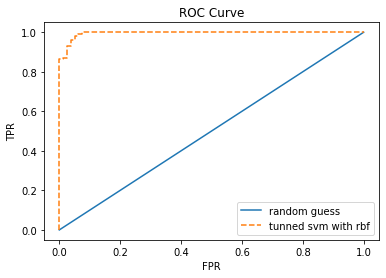

In [70]:
plt.plot([0, 1], [0, 1], label="random guess") # random model
plt.plot(FPR, TPR,  '--', label= "tunned svm with rbf")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()

# Area under the curve(AUC) for tunned SVM

In [72]:

print("AUC:", roc_auc_score(y_test, y_test_pred))


AUC: 0.9609797297297298
